In [133]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from pydantic.dataclasses import dataclass
from pydantic import Field
from sympy import integrate, lambdify, oo, symbols, Piecewise
from sympy.core.symbol import Symbol

from binaryStatistics.base_distribution import BaseDistribution
from binaryStatistics.plot_utils import plot_histogram

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
@dataclass
class Uniform(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
    
    def distribution(self, x, a=None, b=None):
        if a and b:
            self.norm = 1 / (b - a)
            if isinstance(x, Symbol):
                return Piecewise(
                    (0, x < a),
                    (0, x > b),
                    (1 * self.norm, True)
                )
            if isinstance(x, int | float):
                return 1 * self.norm if a <= x <= b else 0.0
            if isinstance(x, np.ndarray):
                return np.piecewise(x, [(x < a), (x <= b) * (x >= a)], [0, 1 * self.norm])
        else:
            self.norm = 1
            return np.ones_like(x) if isinstance(x,np.ndarray) else 1

In [135]:
@dataclass
class Thermal(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
    
    def distribution(self, x):
        return 2*x

In [136]:
@dataclass
class PowerLaw(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
    
    def distribution(self, x):
        return 1/x

In [137]:
uniform = Uniform()
thermal = Thermal()
power = PowerLaw()
data_length = 100_000

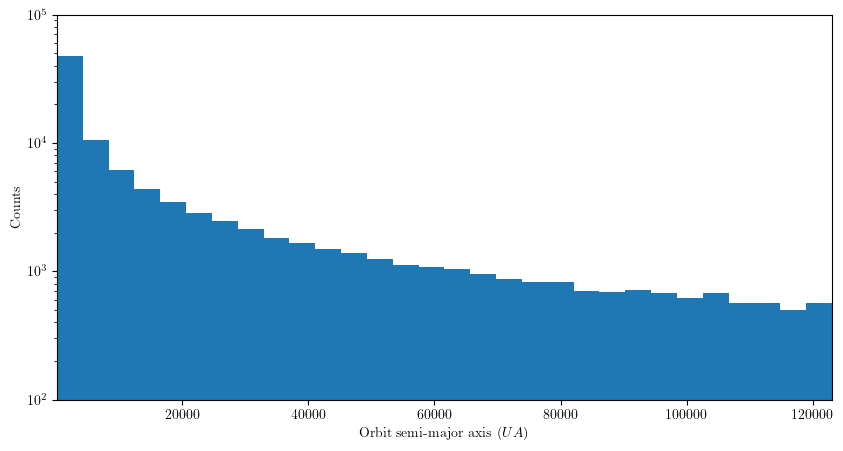

In [138]:
semi_axis = power.random_sample(200, 123759, size=data_length)
plot_histogram(
    semi_axis,
    bins=30,
    density=False,
    color=None,
    x_params={
        "label": "Orbit semi-major axis ($UA$)"
    },
    y_params={
        "limits": (100,100000),
        "scale": "log"
    }
)

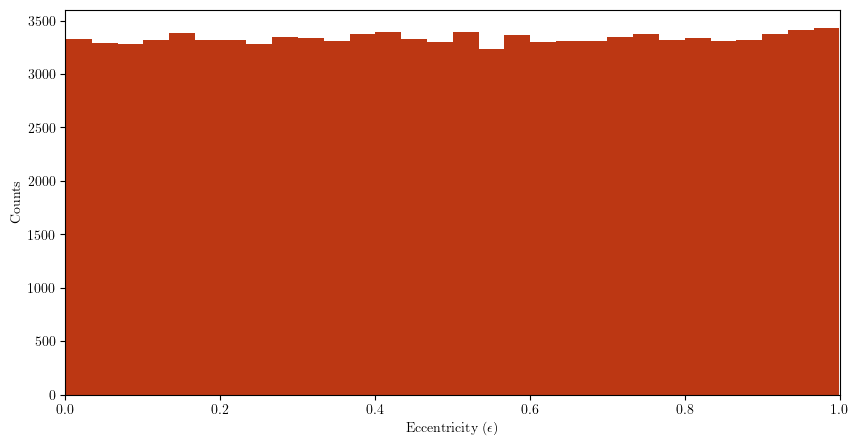

In [139]:
eccentricity = uniform.random_sample(0,1,size=data_length)
plot_histogram(
    eccentricity,
    bins=30,
    density=False,
    color="#bc3713",
    x_params={
        "label": "Eccentricity ($\\epsilon$)",
        "limits": (0,1),
    },
)

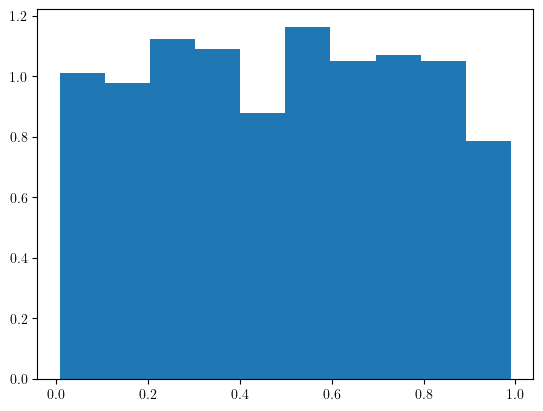

In [45]:
_=plt.hist(uniform.random_sample(0,1,1000), density=True)

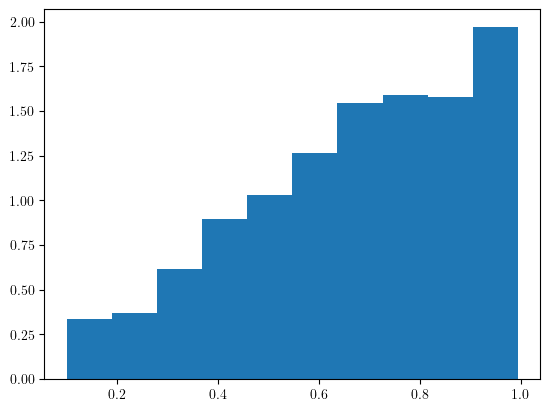

In [46]:
_=plt.hist(thermal.random_sample(0,1,1000), density=True)

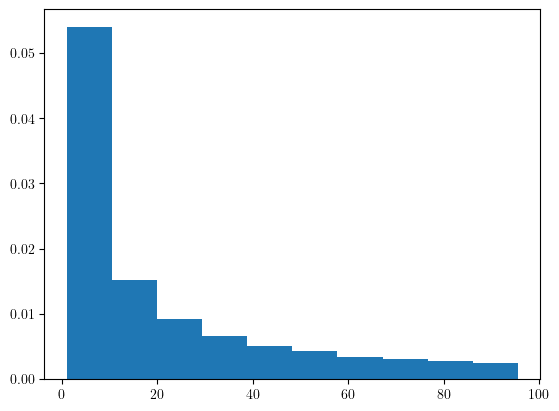

In [51]:
_=plt.hist(power.random_sample(1,100,100000), density=True)